In [13]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
games = pandas.read_csv("games.csv")
print(games.columns)
print(games.shape)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


<function matplotlib.pyplot.show(close=None, block=None)>

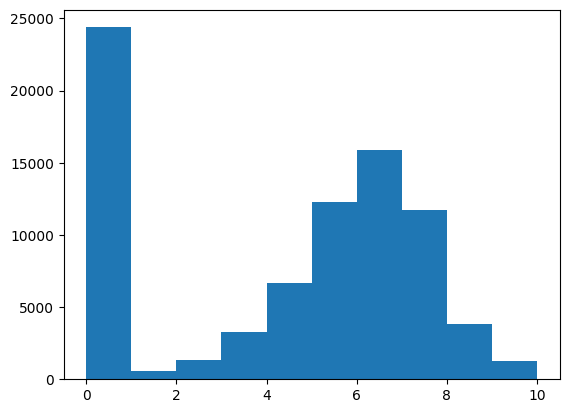

In [3]:
plt.hist(games["average_rating"])
plt.show

In [28]:
#check what's up with the zero scores - preprocessing
# Print the first row of all the games with zero scores.
# The .iloc method on dataframes allows us to index by position.
print(games[games["average_rating"] == 0].iloc[0])
# Print the first row of all the games with scores greater than 0.
print(games[games["average_rating"] > 0].iloc[0])

IndexError: single positional indexer is out-of-bounds

In [5]:
# Remove any rows without user reviews.
games = games[games["users_rated"] > 0]
# Remove any rows with missing values.
games = games.dropna(axis=0)

<function matplotlib.pyplot.show(close=None, block=None)>

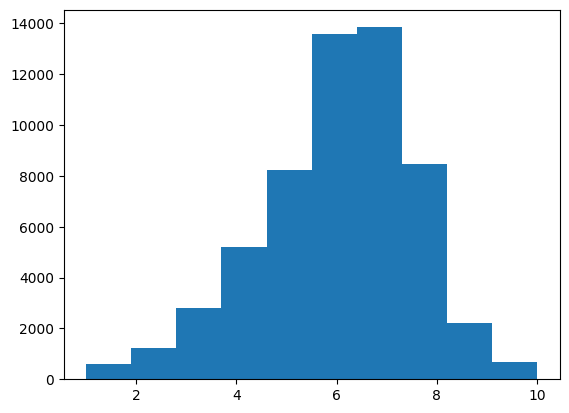

In [6]:
plt.hist(games["average_rating"])
plt.show

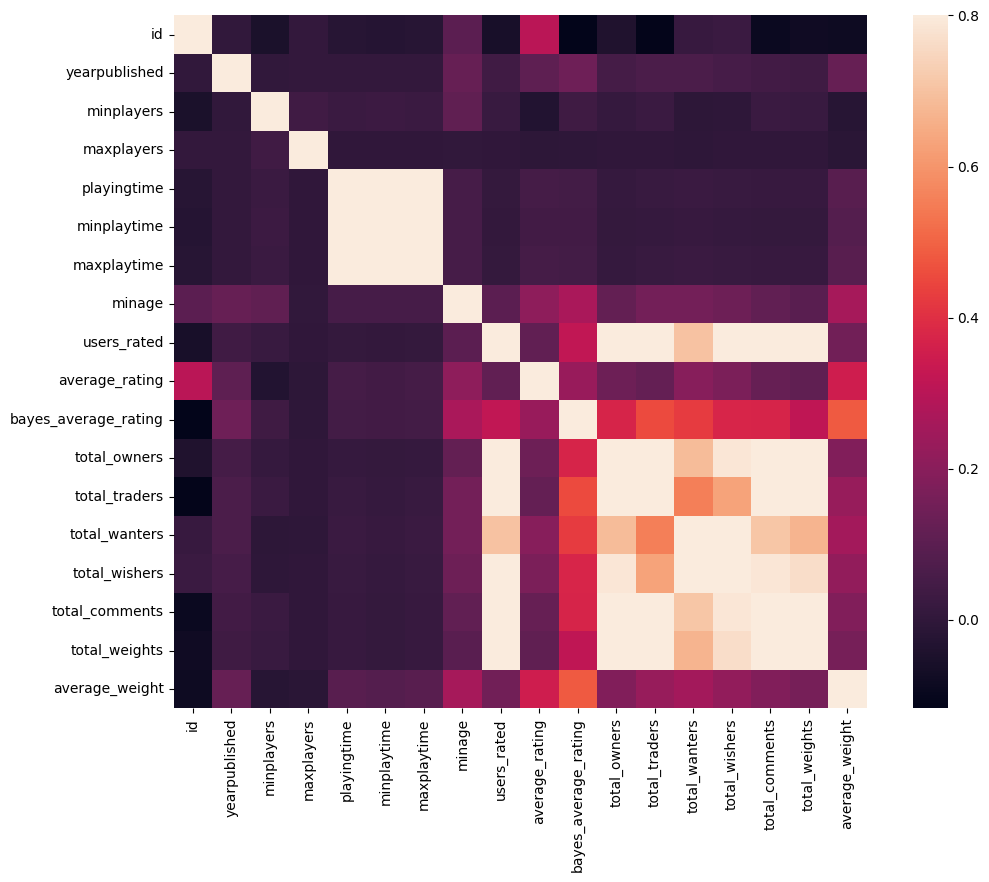

In [11]:
#correlation matrix to check which parts of the data are similar to which other parts
corrmat = games.select_dtypes(include='number').corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

In [10]:
#GET RID OF WHATEVER HAS MEANINGLESS CORRELATIONS (bayes avg depends on avg, id, name and type are just random)
# Get all the columns from the dataframe.
columns = games.columns.tolist()
# Filter the columns to remove ones we don't want.
columns = [c for c in columns if c not in ["bayes_average_rating", "average_rating", "type", "name", "id"]]

# Store the variable we'll be predicting on.
target = "average_rating"

In [15]:
# Import a convenience function to split the sets. next line has been changed as per the version
from sklearn.model_selection import train_test_split

# Generate the training set.  Set random_state to be able to replicate results.
train = games.sample(frac=0.8, random_state=1)
# Select anything not in the training set and put it in the testing set.
test = games.loc[~games.index.isin(train.index)]
# Print the shapes of both sets.
print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


In [16]:
# Import the linear regression model. - linearitysk
from sklearn.linear_model import LinearRegression
# Import the scikit-learn function to compute error.
from sklearn.metrics import mean_squared_error

In [25]:
LR = LinearRegression()
# Fit the model to the training data.
LR.fit(train[columns], train[target])

# Generate our predictions for the test set.
predictions_LR = LR.predict(test[columns])

# Compute error between our test predictions and the actual values.
mean_squared_error(predictions_LR, test[target])

2.078782769489382

In [24]:
# Import the random forest model. - non linearity observed in this model
from sklearn.ensemble import RandomForestRegressor

# Initialize the model with some parameters.
RFR = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)
# Fit the model to the data.
RFR.fit(train[columns], train[target])
# Make predictions.
predictions_RFR = RFR.predict(test[columns])
# Compute the error.
mean_squared_error(predictions_RFR, test[target])

1.4458625791207198

In [22]:
test[columns].iloc[0]

yearpublished      2011.0000
minplayers            2.0000
maxplayers            6.0000
playingtime         200.0000
minplaytime          60.0000
maxplaytime         200.0000
minage               14.0000
users_rated       15709.0000
total_owners      17611.0000
total_traders       273.0000
total_wanters      1108.0000
total_wishers      5581.0000
total_comments     3188.0000
total_weights      1486.0000
average_weight        3.6359
Name: 9, dtype: float64

In [29]:
rating_LR = LR.predict(test[columns].iloc[0].values.reshape(1,-1))
rating_RFR = RFR.predict(test[columns].iloc[0].values.reshape(1,-1))

print("Linear regression predicts an average rating of", rating_LR)
print("Random Forest regression predicts an average rating of", rating_RFR)
print("The actual rating is", test[target].iloc[0])

Linear regression predicts an average rating of [8.12277316]
Random Forest regression predicts an average rating of [7.91373581]
The actual rating is 8.07933


C:\Users\pingm\Personal Folder\ML\AIML course Udemy\ml-resources-and-projects (github)\gym-env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\pingm\Personal Folder\ML\AIML course Udemy\ml-resources-and-projects (github)\gym-env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
